In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
path = '/content/drive/MyDrive/PW SKILLS ASSIGNMENT/EDA Assignment/EDA 4/spotify.csv'
df = pd.read_csv(path)
df

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [4]:
df.shape

(440, 5)

In [5]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

------------
-------------
---------------

# **1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.**

In [7]:
# Check for null values
print(df.isnull().sum())

# Handle null values (example: fill with mean for numerical columns)
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
0


----------
-----------

# **2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.**

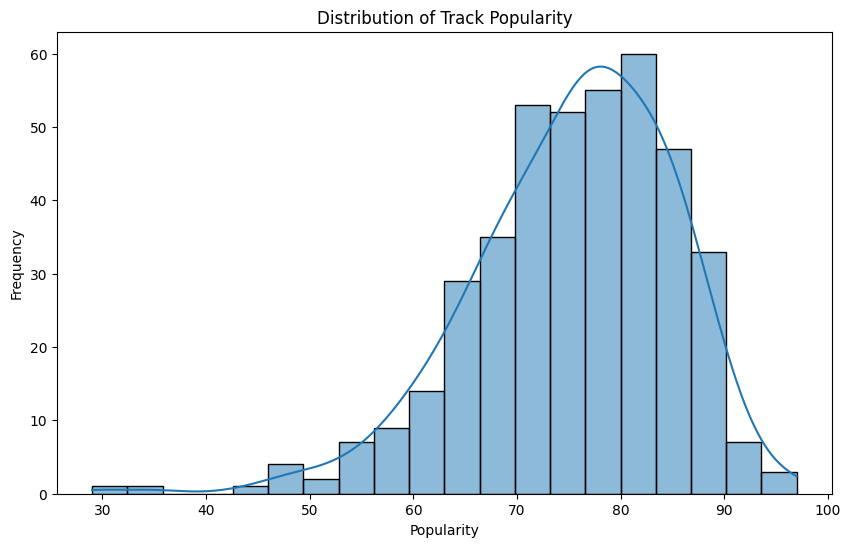

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

----------------
------------

# **3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

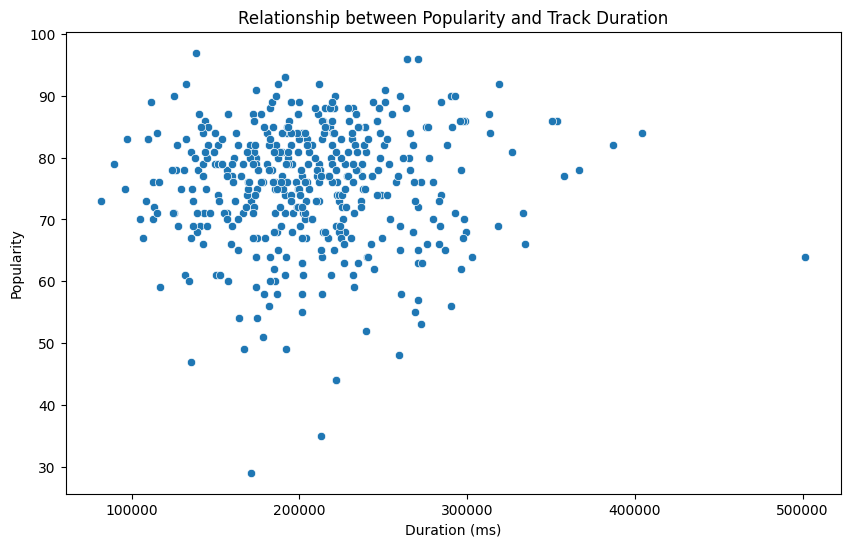

In [20]:
# Assuming 'Popularity' and 'duration_ms' are column names in your DataFrame 'df'

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Relationship between Popularity and Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

--------
----------

# **4.  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.**

The artist with the highest number of tracks is Drake with 20 tracks.


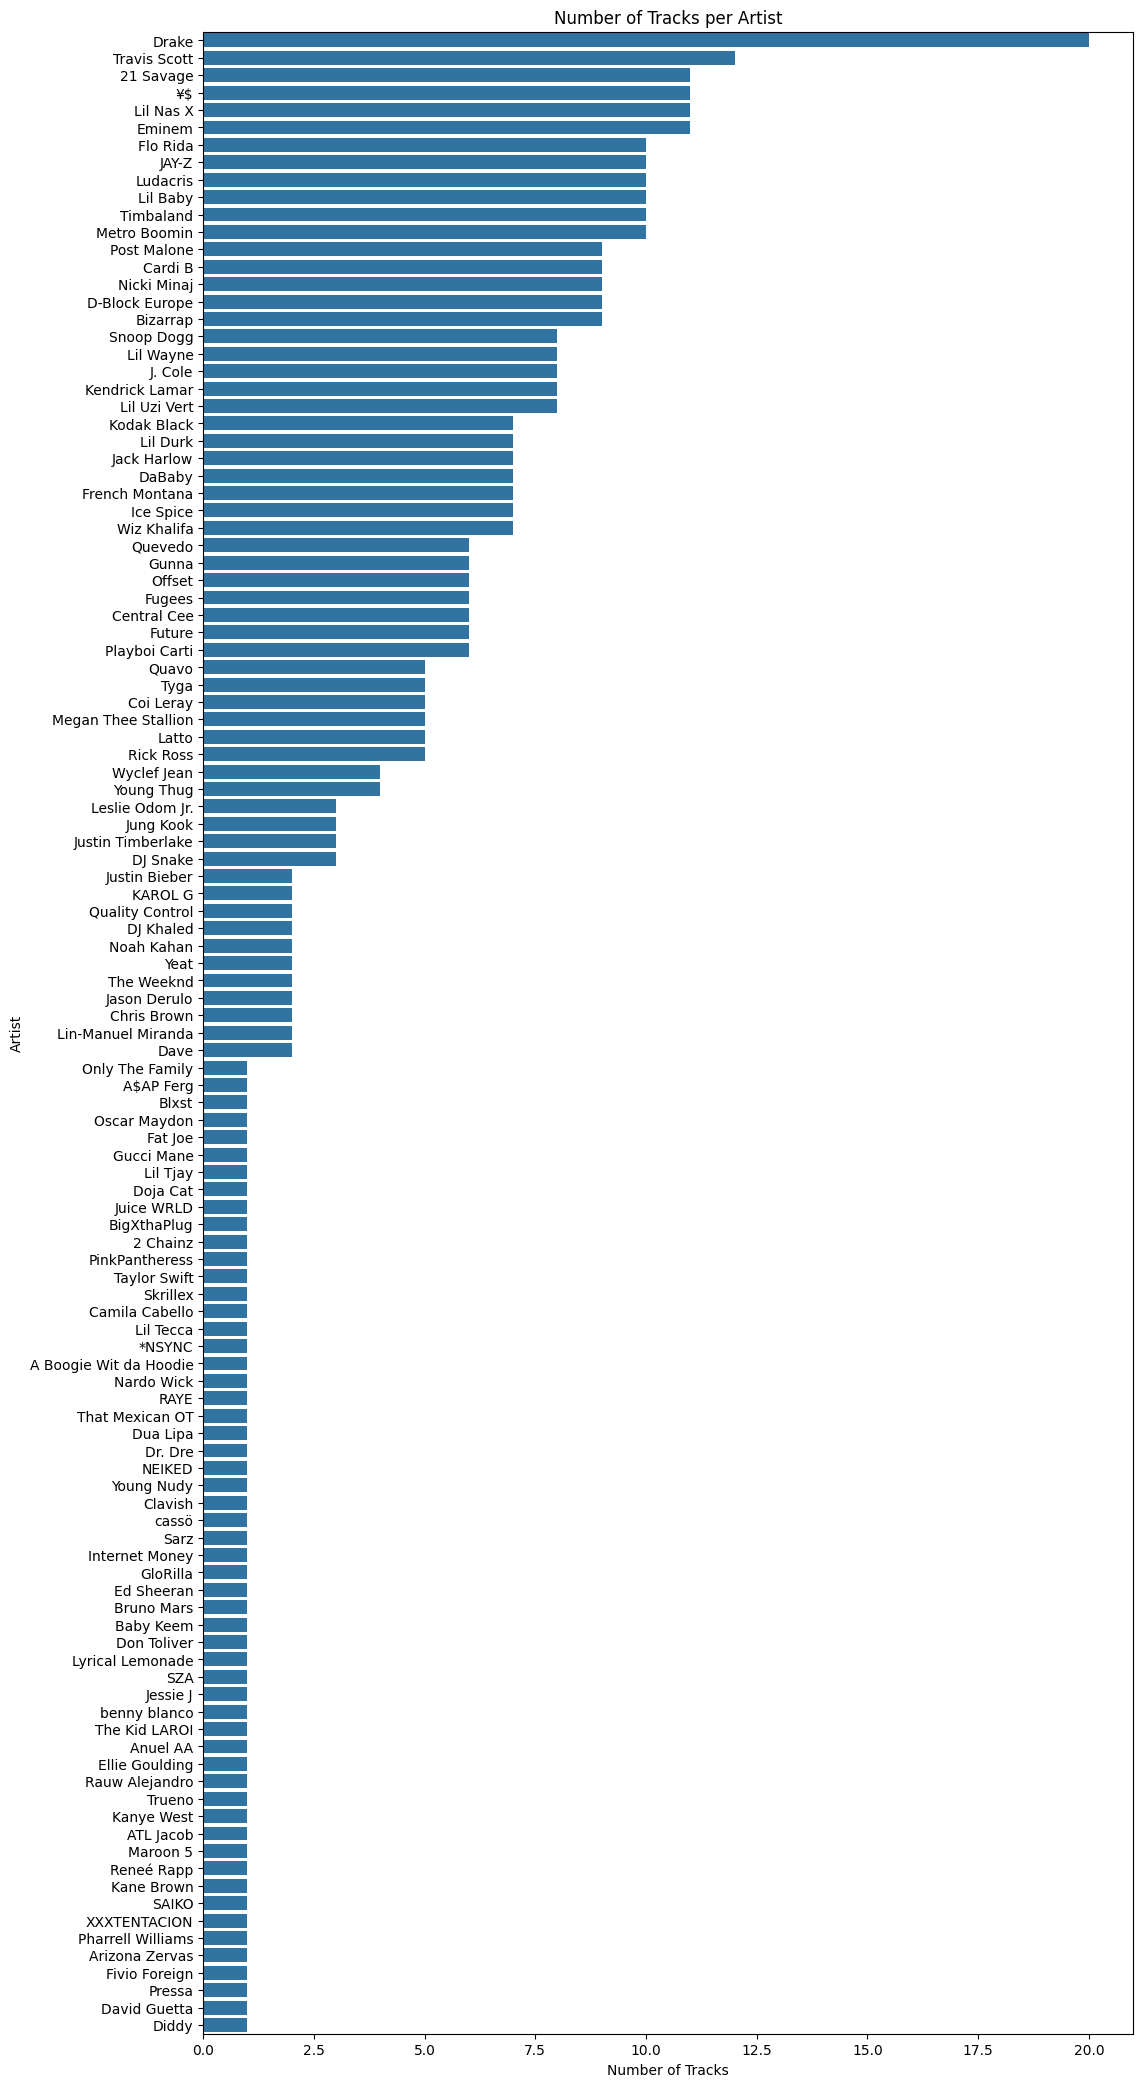

In [23]:
# Count tracks per artist
artist_counts = df['Artist'].value_counts()

# Find the artist with the highest track count
highest_track_artist = artist_counts.index[0]
highest_track_count = artist_counts.iloc[0]

print(f"The artist with the highest number of tracks is {highest_track_artist} with {highest_track_count} tracks.")

# Create the countplot
plt.figure(figsize=(12, 26))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

----------
-------------

# **5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [25]:
# Sort the DataFrame by popularity in ascending order and get the top 5
least_popular_tracks = df.sort_values('Popularity').head(5)

# Display the artist and track name for the least popular tracks
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name']])

Top 5 Least Popular Tracks:
             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
435  French Montana                Splash Brothers
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix


----------
------------

# **6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.**

In [27]:
# Assuming 'Popularity' and 'Artist' are column names in your DataFrame 'df'

# Get the top 5 most popular artists
top_5_artists = df['Artist'].value_counts().head(5).index

# Calculate the average popularity for each of the top 5 artists
average_popularity = {}
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    average_popularity[artist] = artist_tracks['Popularity'].mean()

# Find the artist with the highest average popularity among the top 5
highest_avg_popularity_artist = max(average_popularity, key=average_popularity.get)
highest_avg_popularity = average_popularity[highest_avg_popularity_artist]

# Display the results
print("Average Popularity for Top 5 Artists:")
for artist, popularity in average_popularity.items():
    print(f"{artist}: {popularity:.2f}")

print(f"\nThe artist with the highest average popularity among the top 5 is {highest_avg_popularity_artist} with an average popularity of {highest_avg_popularity:.2f}")

Average Popularity for Top 5 Artists:
Drake: 83.50
Travis Scott: 87.00
21 Savage: 84.18
¥$: 86.09
Lil Nas X: 76.09

The artist with the highest average popularity among the top 5 is Travis Scott with an average popularity of 87.00


-------------
------------

# **7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [29]:
# Get the top 5 most popular artists
top_5_artists = df['Artist'].value_counts().head(5).index

# Iterate through the top 5 artists and find their most popular track
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    print(f"Artist: {artist}, Most Popular Track: {most_popular_track['Track Name']}")

Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
Artist: 21 Savage, Most Popular Track: redrum
Artist: ¥$, Most Popular Track: CARNIVAL
Artist: Lil Nas X, Most Popular Track: THATS WHAT I WANT


-------------
--------------

# **8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

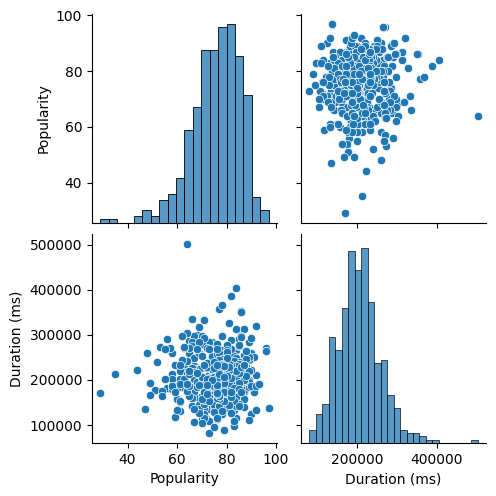

In [32]:
# Select numerical columns for the pair plot
numerical_cols = ['Popularity', 'Duration (ms)',]
sns.pairplot(df[numerical_cols])
plt.show()

----------------
--------------

# **9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

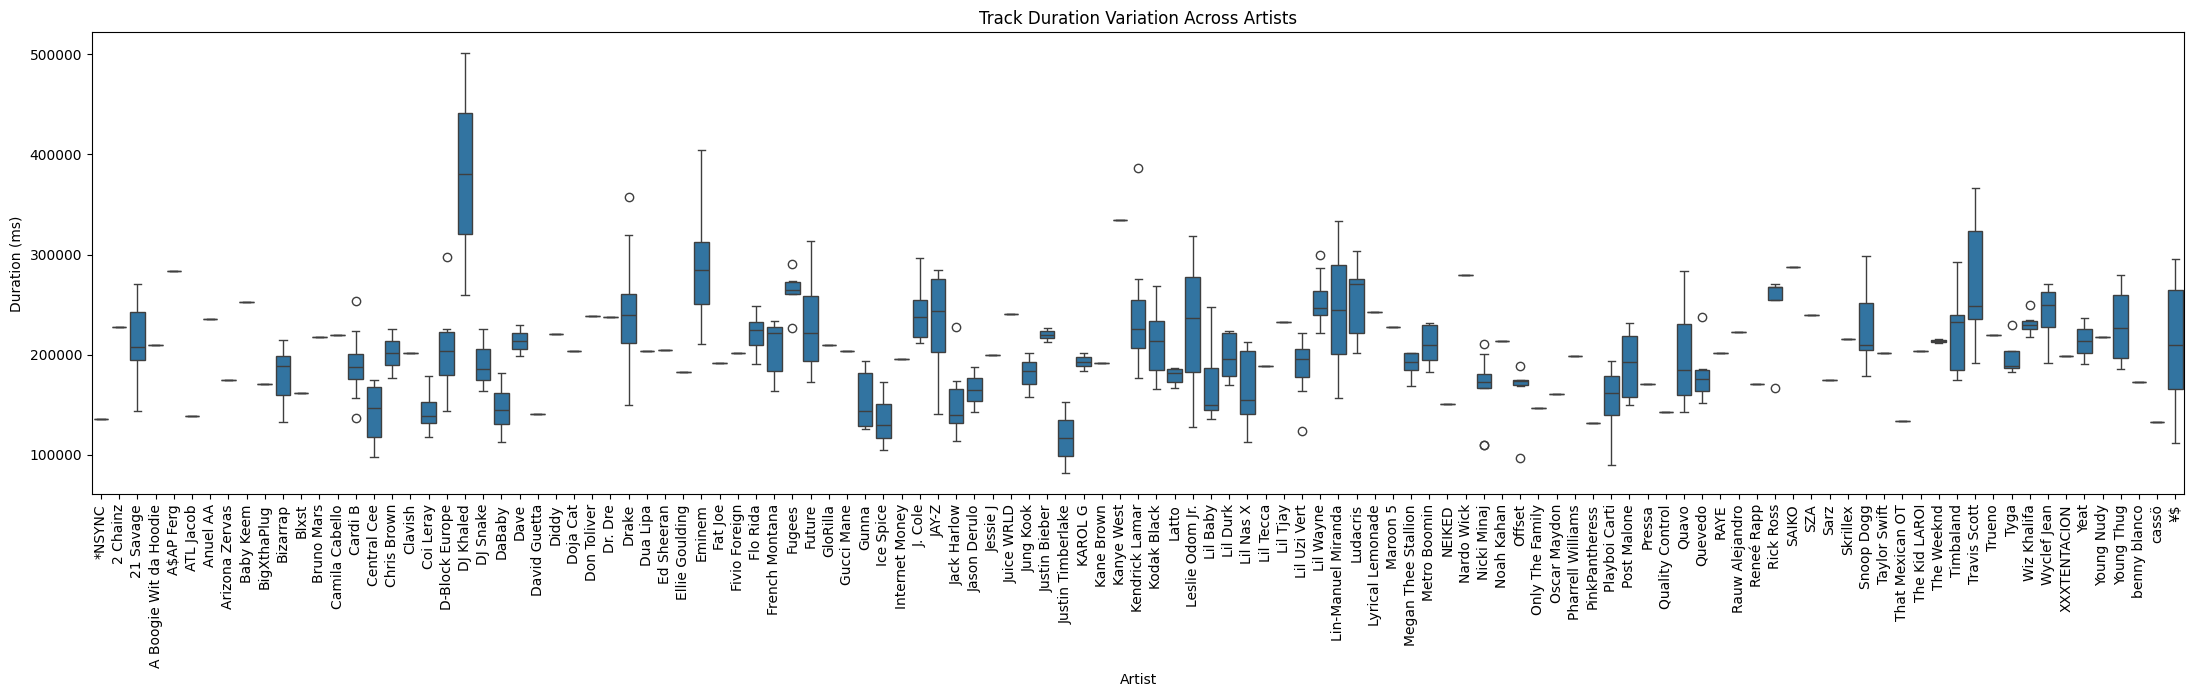

In [35]:
plt.figure(figsize=(27, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df.sort_values('Artist'))
plt.xticks(rotation=90)
plt.title('Track Duration Variation Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

-----------
-------------

# **10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**

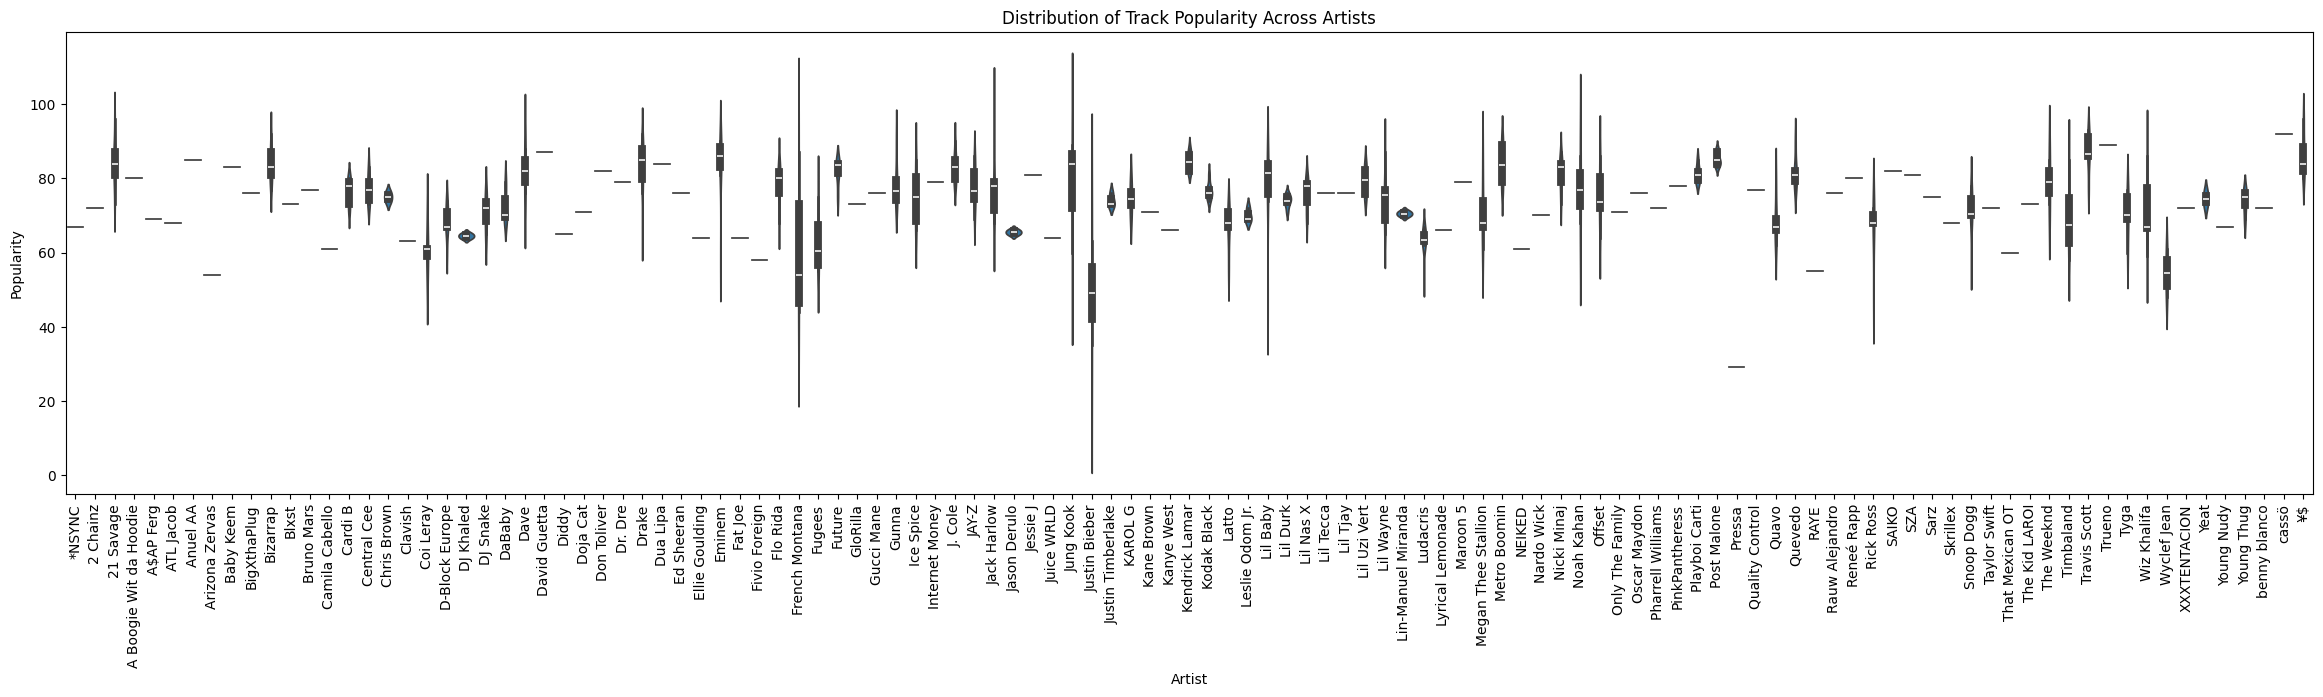

In [37]:
# prompt: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

plt.figure(figsize=(29, 6))
sns.violinplot(x='Artist', y='Popularity', data=df.sort_values('Artist'))
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity Across Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()

-----------------
------------------
---------------